# Session1: Pandas


### What is Pandas?
* Pandas can be thought as Numpy arrays with headers
* A Heterogeneous Data strctures meaning that it can contain variety of data types like integers, floats, strings and datetime.
* Powerful tool to work with missing data, time series and to do basic database functions like group by.

it's full docimentation can be found in https://pandas.pydata.org/pandas-docs/stable/

### Why and when to use Pandas?
* To work with tabular or structured data (like DB tables, Excel sheets or CSV files)
* Import data
* Clean up messy data
* Explore data and gain insight into data
* Process and repare data fro analysis
* Analyse the data (together with other packages liek sklearn)

### The pandas data structure:
* **Series**
Series is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.

* **DataFrame**
DataFrame is a tabular data structure (multi-dimensional object to hold labeled data) comprised of rows and columns. It is a multiple Series objects which share the same index.

![Pandas data structure](../imgs/base_01_pandas_5_0.png)

In [2]:
import pandas as pd
import datetime
import numpy
import matplotlib.pyplot

In [11]:
student_df = pd.DataFrame({"Name":['Michale', 'Susan', 'Fiona', 'Tedd', 'Sabrina'],
                           "Grades":[0.7, 0.5, 0.8, 0.1, 0.9], 
                           "student_ID":[13245,17654,19876,12987,19847],
                           "DOB": [datetime.datetime.strptime('16Sep1994', '%d%b%Y'),datetime.datetime.strptime('16Oct1987', '%d%b%Y'),datetime.datetime.strptime('16Mar2001', '%d%b%Y'),datetime.datetime.strptime('16Sep2012', '%d%b%Y'),datetime.datetime.strptime('1May1990', '%d%b%Y')]})

In [12]:
student_df

,DOB,Grades,Name,student_ID
0,1994-09-16,0.7,Michale,13245
1,1987-10-16,0.5,Susan,17654
2,2001-03-16,0.8,Fiona,19876
3,2012-09-16,0.1,Tedd,12987
4,1990-05-01,0.9,Sabrina,19847


In [13]:
type(student_df.Name)

pandas.core.series.Series

### Attributes of DataFrame

* **Index**
The index (row labels) of the DataFrame

In [14]:
student_df.index

RangeIndex(start=0, stop=5, step=1)

* **Columns**
to return the headers'names of the dataFrame

In [15]:
student_df.columns

Index(['DOB', 'Grades', 'Name', 'student_ID'], dtype='object')

* **Data types**
To check the datatypes of the different columns

In [16]:
student_df.dtypes

DOB           datetime64[ns]
Grades               float64
Name                  object
student_ID             int64
dtype: object

#### Why the data type of "Name" is object not a string ??
The dtype object comes from NumPy, it describes the type of element in a ndarray. Every element in a ndarray must has the same size in byte. For int64 and float64, they are 8 bytes. But for strings, the length of the string is not fixed. So instead of save the bytes of strings in the ndarray directly, Pandas use object ndarray, which save pointers to objects, because of this the dtype of this kind ndarray is object.

![Pandas data structure](../imgs/PFF44.png)

In [17]:
student_df.values

array([[Timestamp('1994-09-16 00:00:00'), 0.7, 'Michale', 13245],
       [Timestamp('1987-10-16 00:00:00'), 0.5, 'Susan', 17654],
       [Timestamp('2001-03-16 00:00:00'), 0.8, 'Fiona', 19876],
       [Timestamp('2012-09-16 00:00:00'), 0.1, 'Tedd', 12987],
       [Timestamp('1990-05-01 00:00:00'), 0.9, 'Sabrina', 19847]],
      dtype=object)

* **To get an overview of that information about the DataFrame, use infor()**

In [18]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
DOB           5 non-null datetime64[ns]
Grades        5 non-null float64
Name          5 non-null object
student_ID    5 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 240.0+ bytes


* **Shape**
like numpy arrays, you can use shape to return the dimensions of hte DataFrame

In [19]:
student_df.shape

(5, 4)

### Series attributes

**Reminder**, a series is a one-dimensional data (a column of a DataFrame)

In [20]:
grades = student_df["Grades"]

#### similar to DataFrame attributes, Series also has index and value attributes but not columns (because it's basically one column)

In [21]:
grades.index

RangeIndex(start=0, stop=5, step=1)

**Using values, you can access the underlying numpy array representation of hte column**

In [22]:
grades.values

array([0.7, 0.5, 0.8, 0.1, 0.9])

#### like Numpy array you can use index to slice column values

In [23]:
grades.values[:2]

array([0.7, 0.5])

In [24]:
grades[3]

0.1

#### Numpy operations can also be applid to Datafrmaes / Series

* **Element-wise operations**

In [25]:
grades * 100

0    70.0
1    50.0
2    80.0
3    10.0
4    90.0
Name: Grades, dtype: float64

* **Range methods**

In [26]:
grades.mean()

0.6

* **Boolean(conditional) indexing**

In [27]:
grades[grades>0.5]

0    0.7
2    0.8
4    0.9
Name: Grades, dtype: float64


* **User defined funcitons**

In [37]:
def pass_func (grade):
    if grade >= 0.5:
        return True
    else:
        return False

In [29]:
student_df['Pass'] = student_df['Grades'].apply(lambda x: pass_func(x))

In [30]:
student_df

,DOB,Grades,Name,student_ID,Pass
0,1994-09-16,0.7,Michale,13245,True
1,1987-10-16,0.5,Susan,17654,True
2,2001-03-16,0.8,Fiona,19876,True
3,2012-09-16,0.1,Tedd,12987,False
4,1990-05-01,0.9,Sabrina,19847,True


### Data import and export
Pandas can import and export variet of data files like:
* csv, text
* SQL databse
* Excel
* json
* others (eg. HDF5, pickle,etc)

In [35]:
titanic_df = pd.read_csv("../data/titanic.csv")

In [36]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data exploration

In [25]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [26]:
titanic_df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Basic summary statistics**

In [27]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Sorting data**

Use .sort_values() method to sort DataFrames. Returns a new instance of a Dataframe.

* column : column name to base the sorting on (list for nested sorting / tuple for multi-index sorting)
* ascending (True) : sort ascending vs. descending (specify list for multiple sort orders)
* inplace (False): result is a new instance of DataFrame

In [31]:
titanic_df.sort_values('Age', ascending=True, inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


In [34]:
titanic_df['Age'].sort_values (ascending=True,inplace=False)

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
831    0.83
305    0.92
827    1.00
381    1.00
164    1.00
183    1.00
386    1.00
172    1.00
788    1.00
642    2.00
7      2.00
530    2.00
297    2.00
824    2.00
205    2.00
119    2.00
340    2.00
479    2.00
16     2.00
348    3.00
407    3.00
374    3.00
261    3.00
43     3.00
193    3.00
       ... 
718     NaN
727     NaN
732     NaN
738     NaN
739     NaN
740     NaN
760     NaN
766     NaN
768     NaN
773     NaN
776     NaN
778     NaN
783     NaN
790     NaN
792     NaN
793     NaN
815     NaN
825     NaN
826     NaN
828     NaN
832     NaN
837     NaN
839     NaN
846     NaN
849     NaN
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

**Visualizing data using pandas DataFrame**

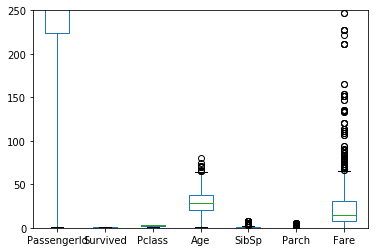

In [492]:
titanic_df.plot(kind='box', ylim=[0,250])

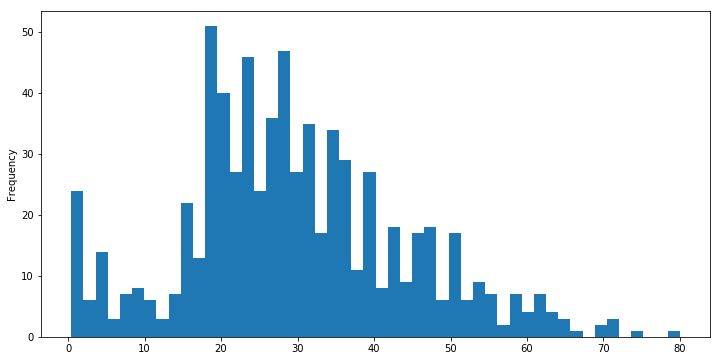

In [493]:
titanic_df['Age'].plot(figsize = (12,6), kind='hist', bins=50)

In [1]:
titanic_df['Age'].plot(figsize = (12,6), kind='bin', bins=50)

NameError: name 'titanic_df' is not defined

### Data cleaning
When the data has redundancy or contains NaN values. Pandas has different techniques to clean the data.


**Data redundancy**
How to know if there is redundancy in our data columns?

In [494]:
titanic_df.duplicated().unique()

array([False])

In [495]:
titanic_df.Age.duplicated().unique()

array([False,  True])

In [496]:
titanic_df.Name.duplicated().unique()

array([False])

In [497]:
titanic_df.Pclass.duplicated().unique()

array([False,  True])

In [498]:
titanic_df.shape

(891, 12)

In [501]:
#keep = {'first', 'last', 'False'}
#first : Drop duplicates except for the first occurrence.
#last : Drop duplicates except for the last occurrence.
#False : Drop all duplicates.
titanic_df = titanic_df.drop_duplicates(subset=['Age'], keep='first')

In [502]:
titanic_df.shape

(89, 12)

In [503]:
titanic_df.Pclass.duplicated().unique()

array([False,  True])

#### How to know if there is any missing data?

In [504]:
titanic_df.Age.isna().unique()

array([False,  True])

In [505]:
titanic_df.Parch.isna().unique()

array([False])

In [506]:
titanic_df.Cabin.isna().unique()

array([ True, False])

#### Empty records. How Pandas handle empty (NaN) records?
* remove all the Nan records (dropna())
* replace NaN values with others (fillna(x))
* Interpolation: performs linear interpolation at missing datapoints.

In [507]:
titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'D33', 'B30', 'C83', 'F G73', 'E31', 'A5', 'C110',
       'F2', 'B19', 'A7', 'C49', 'C87', 'E67', 'D7', 'C22 C26', 'D37',
       'E12', 'C101', 'A23'], dtype=object)

In [508]:
titanic_df.Cabin.dropna().unique()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'D33', 'B30', 'C83', 'F G73', 'E31', 'A5', 'C110', 'F2', 'B19',
       'A7', 'C49', 'C87', 'E67', 'D7', 'C22 C26', 'D37', 'E12', 'C101',
       'A23'], dtype=object)

In [509]:
# Fillna
titanic_df.Age = titanic_df.Age.fillna(titanic_df.Age.mean())

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [510]:
titanic_df.Age.isna().unique()

array([False])

In [511]:
titanic_df.shape

(89, 12)

In [512]:
#interpolation
s = pd.Series([0, 1, np.nan, 3])
print (s)

0    0.0
1    1.0
2    NaN
3    3.0
dtype: float64


In [513]:
 s.interpolate()

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

### Selecting and filtering Data (basic database operations)

In [514]:
#selecting one columns
titanic_df['Age'][:10]

0     22.000000
1     38.000000
2     26.000000
3     35.000000
5     33.716932
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
Name: Age, dtype: float64

In [515]:
#selecting multiuple columns
titanic_df[['Age','Fare']][:10]

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
5,33.716932,8.4583
6,54.000000,51.8625
7,2.000000,21.0750
8,27.000000,11.1333
9,14.000000,30.0708
10,4.000000,16.7000


In [516]:
#slicing
titanic_df[10:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S


#### So far we have seen how to select either by column or by row, 
#### What will happen when we try both

In [517]:
#selecting multuple columns
titanic_df[['Age','Fare']][10]

KeyError: 10

#### How to select by column and row in the same time???
* loc: selection by label
* iloc: selection by position

In [518]:
titanic_df.loc['Bonnell, Miss. Elizabeth', 'Fare']

KeyError: 'the label [Bonnell, Miss. Elizabeth] is not in the [index]'

In [519]:
titanic_indexed_by_Name = titanic_df.set_index('Name')

In [520]:
titanic_indexed_by_Name.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [521]:
titanic_indexed_by_Name.loc['Bonnell, Miss. Elizabeth': 'Andersson, Mr. Anders Johan', 'Fare']

Name
Bonnell, Miss. Elizabeth          26.550
Saundercock, Mr. William Henry     8.050
Andersson, Mr. Anders Johan       31.275
Name: Fare, dtype: float64

#### The difference between retrive based on column value and index

In [528]:
#retrive based on colum value
titanic_df.loc[20.0:31.0,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [529]:
#retrive based on index
titanic_df_indexed_by_Age = titanic_df.set_index('Age')
titanic_df_indexed_by_Age.loc[20.0:31.0,:]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
20.0,13,0,3,"Saundercock, Mr. William Henry",male,0,0,A/5. 2151,8.050,NaN,S
39.0,14,0,3,"Andersson, Mr. Anders Johan",male,1,5,347082,31.275,NaN,S
55.0,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,0,0,248706,16.000,NaN,S
31.0,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,1,0,345763,18.000,NaN,S


In [530]:
#selecting by position 
titanic_df.iloc[30:40,1:4]

,Survived,Pclass,Name
57,0,3,"Novel, Mr. Mansouer"
58,1,2,"West, Miss. Constance Mirium"
59,0,3,"Goodwin, Master. William Frederick"
62,0,1,"Harris, Mr. Henry Birkhardt"
68,1,3,"Andersson, Miss. Erna Alexandra"
70,0,2,"Jenkin, Mr. Stephen Curnow"
71,0,3,"Goodwin, Miss. Lillian Amy"
75,0,3,"Moen, Mr. Sigurd Hansen"
78,1,2,"Caldwell, Master. Alden Gates"
79,1,3,"Dowdell, Miss. Elizabeth"


### Filtering
To select rows based on a certain condition. This can be done with "boolean indexing"

In [534]:
titanic_df['Fare'] > 50

0      False
1       True
2      False
3       True
5      False
6       True
7      False
8      False
9      False
10     False
11     False
12     False
13     False
15     False
18     False
21     False
22     False
23     False
24     False
27      True
30     False
33     False
35      True
37     False
38     False
43     False
50     False
52      True
53     False
54      True
       ...  
170    False
174    False
177    False
179    False
203    False
227    False
252    False
254    False
262     True
275     True
296    False
305     True
314    False
366     True
419    False
438     True
446    False
460    False
469    False
571     True
626    False
630    False
672    False
676    False
720    False
755    False
767    False
803    False
843    False
851    False
Name: Fare, Length: 89, dtype: bool

In [535]:
titanic_df[titanic_df['Fare'] > 50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.00,1,0,113789,52.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.00,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,61.9792,B30,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.00,1,0,W.E.P. 5734,61.1750,E31,S


### Merge, join and concatenate


In [3]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [4]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [5]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])
df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [10]:
pd.concat([df_a, df_b], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


In [16]:
df_new =  pd.concat([df_a, df_b], axis=0)
df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


**Merge two dataframes using the subject_id key
**

In [13]:
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


**Merge with outer join**

Merge with outer join
“Full outer join produces the set of all records in Table A and Table B, with matching records from both sides where available. If there is no match, the missing side will contain null.”

In [15]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


**Merge with inner join**
“Inner join produces only the set of records that match in both Table A and Table B.” - source

In [18]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


**Merge with left join**

Left outer join produces a complete set of records from Table A, with the matching records (where available) in Table B. If there is no match, the right side will contain null.

In [20]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


**Merge while adding a suffix to duplicate column names**

In [21]:
pd.merge(df_a, df_b, on='subject_id', how='left', suffixes=('_left', '_right'))

,subject_id,first_name_left,last_name_left,first_name_right,last_name_right
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


### The group-by operation

#### What is group by?
is applying aggregate functions (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

Group by Steps:
* Applying a condition to the data to get certain groups
* Applying aggreagte functions to these groups

In [537]:
df = pd.DataFrame({'Key':['A','B','C','A','B','C','A','B','C'],
                  'data': [0,5,10,5,10,15,10,15,20]})

In [539]:
for key in ['A','B','C']:
    print(key, df[df['Key'] == key]['data'].sum())

A 15
B 30
C 45


#### There is a simpler way to do the same with Pandas DataFrame
This can be done using groupby() function

In [542]:
df.groupby('Key').sum()

,data
Key,
A,15
B,30
C,45


In [545]:
df.groupby('Key').aggregate(np.mean)

,data
Key,
A,5
B,10
C,15


### Apply

**How to apply functions to dataframes and series?**

* **map() function as a Series method 
    Mostly used for mapping categorical data to numerical data**    

In [46]:
train_df = pd.read_csv("../Data/train.csv")
train_df.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
# create new column
train_df['Sex_num'] = train_df.Sex.map({'female':1, 'male':-1})

In [53]:
# let's compared Sex and Sex_num columns
# here we can see we map male to 1 and female to 0
train_df.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,-1
1,female,1
2,female,1
3,female,1
4,male,-1


* **apply() function as a Series method. 
    Applies a function to each element in the Series**

In [54]:
# say we want to calculate length of string in each string in "Name" column

# create new column
# we are applying Python's len function
train_df['Name_length'] = train_df.Name.apply(len)

In [56]:
# the apply() method applies the function to each element
train_df.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [57]:
import numpy as np

# say we look at the "Fare" column and we want to round it up
# we will use numpy's ceil function to round up the numbers
train['Fare_ceil'] = train.Fare.apply(np.ceil)
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


* **applying a user defined function**

In [76]:
# let's extract last name of each person

# we will use a str method
# now the series is a list of strings
# each cell has 2 strings in a list as you can see below
train_df.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [77]:
# we just want the first string from the list
# we create a function to retrieve
def get_element(my_list, position):
    return my_list[position]

In [78]:
# use our created get_element function
# we pass position=0
train_df.Name.str.split(',').apply(get_element, position=0).head()


0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [80]:
# instead of above, we can use a lambda function
# input x (the list in this case)
# output x[0] (the first string of the list in this case)
train_df.Name.str.split(',').apply(lambda x: x[0]).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

* **apply() function as a DataFrame method. Applies a function on either axis of the DataFrame**
 * axis = 0 --> applies the function column wise
 * axis =1 --> applies the function row wise

In [60]:
url = 'http://bit.ly/drinksbycountry'
drinks_df = pd.read_csv(url)
drinks_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [67]:
drinks_df.to_csv('../Data/drinks.csv')

In [64]:
drinks_df.loc[:, 'beer_servings':'wine_servings'].head(3)

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14


In [62]:
# you want apply() method to travel axis=0 (downwards, column) 
# apply Python's max() function
drinks_df.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [70]:
# you want apply() method to travel axis=1 (right, row) 
# apply Python's max() function
drinks_df.loc[:, 'beer_servings':'wine_servings'].apply(max, axis=1).head(5)

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [71]:
# finding which column is the maximum's category name
drinks_df.loc[:, 'beer_servings':'wine_servings'].apply(np.argmax, axis=1).head(5)

/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

* **applymap() as a DataFrame method. Applies function to every element**

In [72]:
drinks_df.loc[:, 'beer_servings': 'wine_servings'].applymap(float).head()

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0


### Time series data in Pandas

In [1]:
import pandas as pd
time_df_1 = pd.read_csv('data/20000101_20161231-NO2.csv')

In [2]:
time_df_1.head(5)

,timestamp;BASCH;BONAP;PA18;VERS
0,;microg/m3;microg/m3;microg/m3;microg/m3
1,2000-01-01 01:00:00;108.0;n/d;65.0;47.0
2,2000-01-01 02:00:00;104.0;60.0;77.0;42.0
3,2000-01-01 03:00:00;97.0;58.0;73.0;34.0
4,2000-01-01 04:00:00;77.0;52.0;57.0;29.0


In [83]:
time_df = pd.read_csv('../data/20000101_20161231-NO2.csv', sep=';', skiprows= [1],na_values = ['n/d'], parse_dates=True)

In [84]:
time_df.head(5)

,timestamp,BASCH,BONAP,PA18,VERS
0,2000-01-01 01:00:00,108.0,NaN,65.0,47.0
1,2000-01-01 02:00:00,104.0,60.0,77.0,42.0
2,2000-01-01 03:00:00,97.0,58.0,73.0,34.0
3,2000-01-01 04:00:00,77.0,52.0,57.0,29.0
4,2000-01-01 05:00:00,79.0,52.0,64.0,28.0


In [85]:
index = pd.DatetimeIndex(time_df.timestamp.values)
time_df = time_df.set_index(index)

In [86]:
time_df["2010-01-01 09:00": "2010-01-01 12:00"]

,timestamp,BASCH,BONAP,PA18,VERS
2010-01-01 09:00:00,2010-01-01 09:00:00,31.0,27.0,28.0,14.0
2010-01-01 10:00:00,2010-01-01 10:00:00,41.0,31.0,30.0,14.0
2010-01-01 11:00:00,2010-01-01 11:00:00,48.0,32.0,33.0,16.0
2010-01-01 12:00:00,2010-01-01 12:00:00,63.0,33.0,39.0,19.0


In [87]:
time_df["2012-01": "2012-03"].head(5)

,timestamp,BASCH,BONAP,PA18,VERS
2012-01-01 00:00:00,2012-01-01 00:00:00,44.0,34.0,32.0,7.0
2012-01-01 01:00:00,2012-01-01 01:00:00,56.0,35.0,29.0,9.0
2012-01-01 02:00:00,2012-01-01 02:00:00,50.0,36.0,29.0,7.0
2012-01-01 03:00:00,2012-01-01 03:00:00,46.0,34.0,22.0,8.0
2012-01-01 04:00:00,2012-01-01 04:00:00,47.0,29.0,21.0,12.0


In [88]:
time_df.index

DatetimeIndex(['2000-01-01 01:00:00', '2000-01-01 02:00:00',
               '2000-01-01 03:00:00', '2000-01-01 04:00:00',
               '2000-01-01 05:00:00', '2000-01-01 06:00:00',
               '2000-01-01 07:00:00', '2000-01-01 08:00:00',
               '2000-01-01 09:00:00', '2000-01-01 10:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', length=149039, freq=None)

In [89]:
time_df.index.hour

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', length=149039)

In [90]:
time_df.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016],
           dtype='int64', length=149039)

In [91]:
time_df.resample('M').mean().head()

,BASCH,BONAP,PA18,VERS
2000-01-31,96.896127,87.108108,69.820027,37.961290
2000-02-29,92.193437,88.695024,63.164502,35.393939
2000-03-31,108.150070,84.986505,62.695946,42.619308
2000-04-30,96.270950,85.221448,58.670851,30.706704
2000-05-31,99.247632,82.153639,51.150000,29.678426


In [92]:
time_df.resample('D').mean().head()

,BASCH,BONAP,PA18,VERS
2000-01-01,83.173913,53.772727,64.695652,36.521739
2000-01-02,78.708333,59.250000,63.708333,17.166667
2000-01-03,82.333333,73.541667,61.000000,23.083333
2000-01-04,78.500000,73.708333,48.863636,23.791667
2000-01-05,94.291667,90.458333,60.166667,28.214286


In [93]:
time_df.resample('M').max().head()

,timestamp,BASCH,BONAP,PA18,VERS
2000-01-31,2000-01-31 23:00:00,194.0,252.0,249.0,119.0
2000-02-29,2000-02-29 23:00:00,210.0,205.0,143.0,114.0
2000-03-31,2000-03-31 23:00:00,302.0,248.0,218.0,134.0
2000-04-30,2000-04-30 23:00:00,187.0,227.0,121.0,94.0
2000-05-31,2000-05-31 23:00:00,206.0,234.0,150.0,106.0


In [94]:
time_df.resample('D').max().head()

,timestamp,BASCH,BONAP,PA18,VERS
2000-01-01,2000-01-01 23:00:00,109.0,62.0,77.0,59.0
2000-01-02,2000-01-02 23:00:00,109.0,96.0,78.0,45.0
2000-01-03,2000-01-03 23:00:00,120.0,102.0,72.0,37.0
2000-01-04,2000-01-04 23:00:00,115.0,107.0,78.0,43.0
2000-01-05,2000-01-05 23:00:00,141.0,115.0,82.0,41.0


/Users/fatma/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


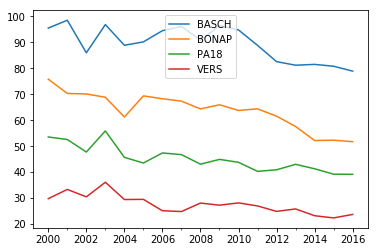

In [95]:
time_df.resample('Y').plot()